In [1]:
# Indlæs biblioteker 
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit

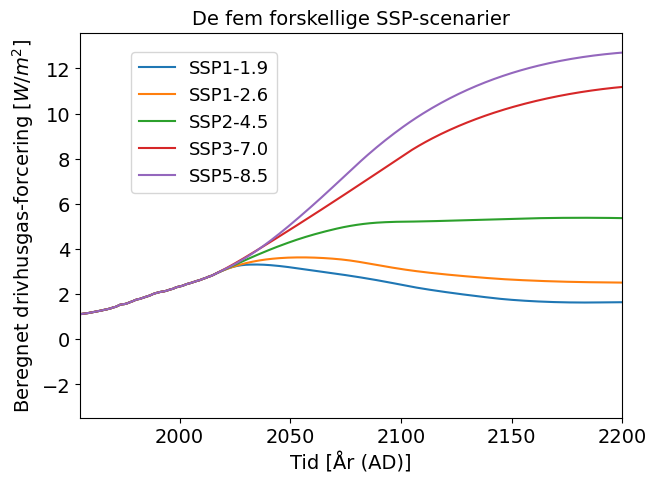

In [25]:
# Indlæser SSP drivhusgas-forceringsscenarier og plotter dem.
# Disse scenarier anvendes til IPCC's seneste rapport og bruges til at definere menneskeskabt strålingsforcering.

SSP=np.loadtxt('SSP_Paleo_GHG_Forcing_Scenarios.txt')   # Indlæser SSP scenarier
CO2DATA = np.genfromtxt('co2udvikling.csv',skip_header=1, delimiter=',')
OceanHeat = np.genfromtxt('ohc_global_1955.txt',skip_header=8, skip_footer=2)
SeaTemp = np.genfromtxt('sea-surface-temperature-anomaly.csv',skip_header=105, skip_footer=514, delimiter=',')

fig_Profile , ax_Profile = plt.subplots ( figsize =(7 , 5) )     # Åbner en figur
l1, =ax_Profile.plot(SSP[:,0],SSP[:,1])                           # Tegner Scenario SSP1-1.9
l2, =ax_Profile.plot(SSP[:,0],SSP[:,2])                           # Tegner Scenario SSP1-2.6
l3, =ax_Profile.plot(SSP[:,0],SSP[:,3])                           # Tegner Scenario SSP2-4.5
l4, =ax_Profile.plot(SSP[:,0],SSP[:,4])                           # Tegner Scenario SSP3-7.0
l5, =ax_Profile.plot(SSP[:,0],SSP[:,5])                           # Tegner Scenario SSP5-8.5
plt.xlim(2000,2200)
fig_Profile.legend((l1,l2,l3,l4,l5),('SSP1-1.9','SSP1-2.6','SSP2-4.5','SSP3-7.0','SSP5-8.5'),loc=[0.2,0.6],fontsize=13)
ax_Profile.set_xlabel('Tid [År (AD)]',fontsize=14)
ax_Profile.set_ylabel('Beregnet drivhusgas-forcering '+r'[$W/m^2$]',fontsize=14)
ax_Profile.tick_params(which='major',labelsize=14)
ax_Profile.set (xlim=(1955,2200))
ax_Profile.set_title("De fem forskellige SSP-scenarier", fontsize=14)
plt.savefig('SSP_GHG_Forcing_Scenarios.png',dpi=300, bbox_inches='tight')

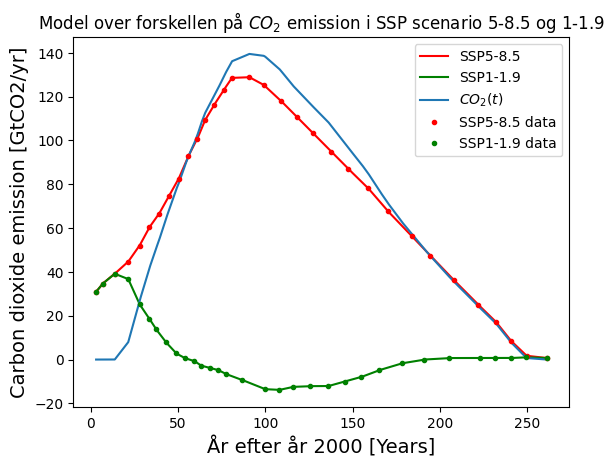

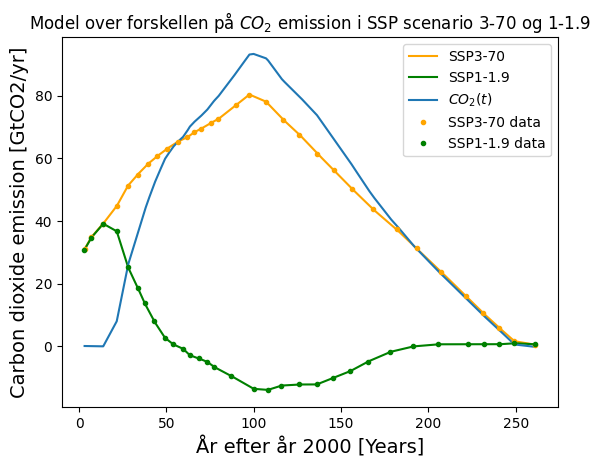

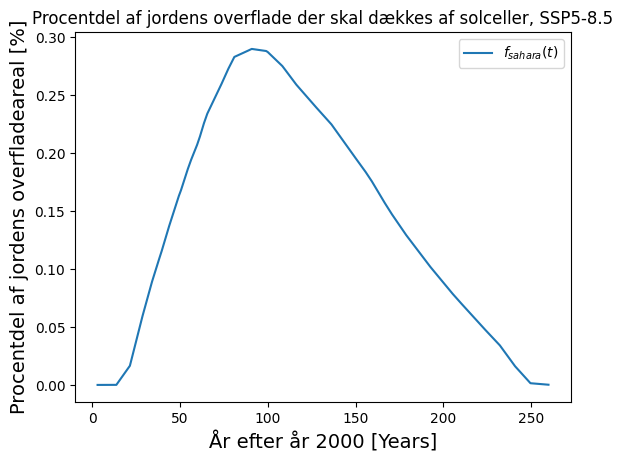

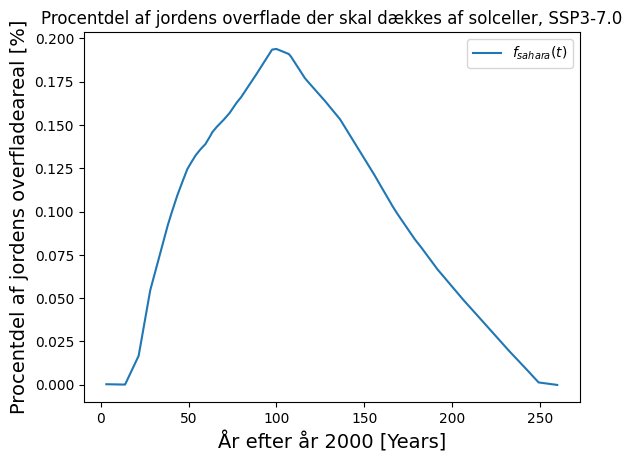

0.002123377184741762 0.0013620882556025983
2.7688
2.8228
0.0006980953235503217
0.289822079021685 90.80000000000007
0.1938506229140758 99.80000000000008


In [54]:
f = interp1d(CO2DATA[:,0],CO2DATA[:,1])                # Lineær interpolations-funktion defineres fro det valgte scenarie
f2 = interp1d(CO2DATA[:,2],CO2DATA[:,3])
f3 = interp1d(CO2DATA[:,4],CO2DATA[:,5])

#Funktion der giver Gigaton carbondioxid vores solceller skal erstatte efter år 2000 til år 2250
'''
def f(x):
    return 43.8809108-0.822596154*x+0.0693815243*x**2-0.000385655734*x**3-5.58257207*10**(-6)*x**4+6.56002888*10**(-8)*x**5-2.42439269*10**(-10)*x**6+3.07785205*10**(-13)*x**7
def f2(x):
    return 35.0322691+2.15186087*x-0.135149413*x**2+0.00251883660*x**3-2.32504086*10**(-5)*x**4+1.16041235*10**(-7)*x**5-2.98410405*10**(-10)*x**6+3.09163132*10**(-13)*x**7
def f3(x):
    return 37.0380686+0.834320771*x+0.00368447139*x**2-8.31505501*10**(-5)*x**3+1.09554915*10**(-7)*x**4+1.02899567*10**(-9)*x**5-2.47800076*10**(-12)*x**6
'''
ConvertionF = 0.21971830985*3.6641412039
def CO2(x):
    return (f(x)-f2(x))*ConvertionF
def CO22(x):
    return (f3(x)-f2(x))*ConvertionF
def E(x):
    return (CO2(x)*10**12)*4.289

t1 = np.arange(3.1, 260, 0.1)

plt.plot(t1,f(t1)*ConvertionF,label="SSP5-8.5",color="r")
plt.plot(t1,f2(t1)*ConvertionF,label="SSP1-1.9",color="g")
plt.plot(t1,CO2(t1),label="$CO_2(t)$")
plt.plot(CO2DATA[:,0], CO2DATA[:,1]*ConvertionF,'.', label="SSP5-8.5 data",color="r")
plt.plot(CO2DATA[:,2], CO2DATA[:,3]*ConvertionF,'.', label="SSP1-1.9 data",color="g")
plt.legend()
plt.title("Model over forskellen på $CO_2$ emission i SSP scenario 5-8.5 og 1-1.9")
plt.xlabel("År efter år 2000 [Years]", fontsize=14)
plt.ylabel("Carbon dioxide emission [GtCO2/yr]", fontsize=14)
plt.show()

plt.plot(t1,f3(t1)*ConvertionF,label="SSP3-70",color="orange")
plt.plot(t1,f2(t1)*ConvertionF,label="SSP1-1.9",color="g")
plt.plot(t1,CO22(t1),label="$CO_2(t)$")
plt.plot(CO2DATA[:,4], CO2DATA[:,5]*ConvertionF,'.', label="SSP3-70 data",color="orange")
plt.plot(CO2DATA[:,2], CO2DATA[:,3]*ConvertionF,'.', label="SSP1-1.9 data",color="g")
plt.legend()
plt.title("Model over forskellen på $CO_2$ emission i SSP scenario 3-70 og 1-1.9")
plt.xlabel("År efter år 2000 [Years]", fontsize=14)
plt.ylabel("Carbon dioxide emission [GtCO2/yr]", fontsize=14)
plt.show()


FS=1368                  # Solindstråling i W/m**2
StS = 8765.8               # Hours in a year
SE = 0.135               # Solcellers effectivitet

EPS = (StS*(FS/4)*SE)/1000   # Eneregi produceret pr. m^2 solceller i sahara om året i kWh

def AS(x):               # Berenger hvor mange km^2 der skal dækkes med solceller for at dække energibehov
    return (E(x)/EPS)*10**-6 

def f_sahara(x):         # Beregner andelen af jorden der skal dækkes med solceller
    return AS(x)/510100000
def f_sahara2(x):         # Beregner andelen af jorden der skal dækkes med solceller
    return ((((CO22(x)*10**12)*4.289)/EPS)*10**-6)/510100000

plt.plot(t1,f_sahara(t1)*100,label="$f_{sahara}(t)$")
plt.legend()
plt.title("Procentdel af jordens overflade der skal dækkes af solceller, SSP5-8.5")
plt.xlabel("År efter år 2000 [Years]", fontsize=14)
plt.ylabel("Procentdel af jordens overfladeareal [%]", fontsize=14)
plt.show()

plt.plot(t1,f_sahara2(t1)*100,label="$f_{sahara}(t)$")
plt.legend()
plt.title("Procentdel af jordens overflade der skal dækkes af solceller, SSP3-7.0")
plt.xlabel("År efter år 2000 [Years]", fontsize=14)
plt.ylabel("Procentdel af jordens overfladeareal [%]", fontsize=14)
plt.show()
scenarios = 1                                             # Her vælges, hvilket SSP-scenarie man anvender!
SSPint=interp1d(SSP[:,0],SSP[:,scenarios])
print(f_sahara(61), f_sahara2(57))
print(SSPint(2061)-SSPint(1850))
print(SSPint(2057)-SSPint(1850))

print(f_sahara(14.1)*100)

index = (f_sahara(t1)*100).argmax()
max_valuef = (f_sahara(t1)*100)[index]
year = t1[index]
print(max_valuef, year)
index = (f_sahara2(t1)*100).argmax()
max_valuef2 = (f_sahara2(t1)*100)[index]
year = t1[index]
print(max_valuef2, year)

[[ 3.64063270e-51 -7.77581242e-28]
 [-7.77581242e-28  2.18011134e-04]]
[3.64063270e-51 2.18011134e-04]
2.560901679071095
2.0381928677806174e-24 6.033765570028535e-26


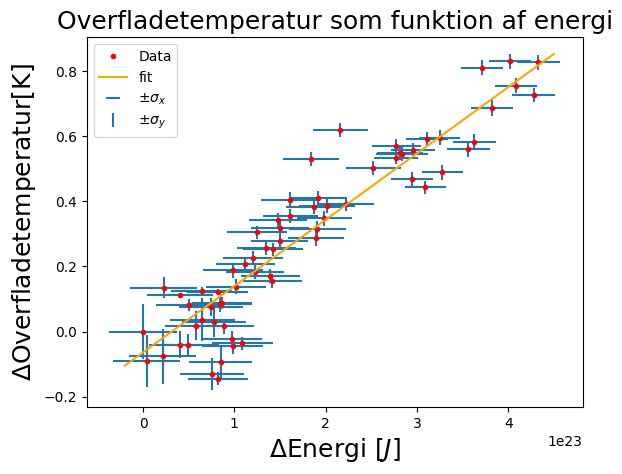

<Figure size 640x480 with 0 Axes>

In [45]:
J = OceanHeat[:,3]*10**22
Te = SeaTemp[:,3]-SeaTemp[0,3]

U_J = np.array(OceanHeat[:,4]*10**22, dtype=np.float64)
U_T = (abs(SeaTemp[:,5])-abs(SeaTemp[:,4]))/2

def linear(x, m, c):
    return m*x + c

#guess = [1000, 1000, 0.94, 1.06, 0.1, 100, 100]
#names = ['A1', 'A2', 'mu1', 'mu2', 'sigma', 'm', 'c']

par, cov = curve_fit(linear, J, Te, sigma=U_T, absolute_sigma=True)
a , d = par
a_err, d_err = np.sqrt(np.diag(cov))

par, cov = curve_fit(linear, J, Te, sigma=np.sqrt(U_T**2+(U_J*a)**2), absolute_sigma=True)
m , c = par
m_err, c_err = np.sqrt(np.diag(cov))

print(cov)
print(np.diag(cov))
X = np.linspace(-0.2*10**23,4.5*10**23,1000)
y_model = linear(X, *par)

fig = plt.figure()
ax = plt.gca()
plt.errorbar(J, Te, xerr=U_J, fmt='none', label = "$\pm \sigma_x$")
plt.errorbar(J, Te,yerr=U_T, fmt='none', label = "$\pm \sigma_y$")
plt.plot(J, Te,'.', label = "Data", color="r")
plt.plot(X, y_model, label = "fit", color = "orange")
plt.legend()
plt.xlabel(r"$\Delta$Energi [$J$]", fontsize=18)
plt.ylabel("$\Delta$Overfladetemperatur[K]", fontsize=18)
plt.title(f"Overfladetemperatur som funktion af energi", fontsize=18)
plt.figure()
print(np.sum(((Te-linear(J,*par))**2)/(U_T**2+(U_J*a)**2))/(len(J)-2))
print(m, m_err)

In [5]:
eps0 = 0.6263779897
eps0_err = 0.0008

deps_dT=-0.00411 # Ændring i emissivitet per K temperaturændring
deps_dT_err=0.00005

REarth=6371e3   # Radius af Jordens i m

dWater=150      # Dybden af det vel blandede lag af havet i m 
AOcean=0.05     # Gennemsnitlig albedo af havet
ACloud=0.5      # Gennemsnitlig albedo af skyer
Asolceller=0.1
Aørken=0.4
#(AOcean+ACloud)/2
A0 = 0.297
A0_err = 0.005
def A(x):
    return A0+(Asolceller-Aørken)*f_sahara(x)   # Her antages at skyer dækker halvdelen af overfladen og gennemsnitlig albedo udregnes
def A2(x):
    return A0+(Asolceller-Aørken)*f_sahara2(x)
rhoWater=1000   # Densitet af vand i kg/m**3
cWater=4.18e3   # Specifik varmekapacitet af vand i J/(kg)/(K)

COcean1 =dWater*cWater*rhoWater*4*np.pi*REarth**2   # Total varmekapacitet af den velblandede del af verdenshavet
COcean = 1/m
C = m

T0=286.8405                  # Start temperatur for Ocean-Jord planeten
T0_err = 0.11511         # Usikkerhed på start temp

SBconst=5.67e-8          # Stefan-Boltzmanns konstant i W/(m**2)/(K**4)

secyear=365.25*24*60*60  # Antal sekunder i et år
t0 = 1850                # Start år

N=4000             # Antal tidsskridt
dt=1/10              # Tidsskridt-størrelse i år
t = np.linspace(t0, t0 + N*dt, N) #Tids-array

In [6]:
#Modellen
def Tidsskridt(V):    
    T1, EOcean1, t = V[0], V[1], V[2] 
    if eps_temp_dep:
        # temperaturafhængig emissivitet
        eps = eps0 + deps_dT*(T1-T0) # 

    else:
        # konstant emissivitet
        eps = eps0

    if human_ghg_on:
        # Indlæsning af drivhusgas-forcering og udregning af, hvor meget den er øget siden tiden t0, hvor modelkørslen startes 
        dF = SSPint(t)-SSPint(t0)

    else:
        # Ingen drivhusgas-forcering
        dF = 0
    if A_nr_1_on:
        if solcelle_vækst_on:
            # Udvikling af albedoeffecten grundet solceller
            if t<2014 or t>2260:
                ESW = FS*(1-A0)*np.pi*REarth**2*dt*secyear  #Indkommende kortbølge-stråling beregnes
            else:
                ESW = FS*(1-A(t-2000))*np.pi*REarth**2*dt*secyear
        else:
            #Ingen udvikling af albedo effekten
            ESW = FS*(1-A0)*np.pi*REarth**2*dt*secyear  #Indkommende kortbølge-stråling beregnes
    else:
        if solcelle_vækst_on:
            # Udvikling af albedoeffecten grundet solceller
            if t<2014 or t>2260:
                ESW = FS*(1-A0)*np.pi*REarth**2*dt*secyear  #Indkommende kortbølge-stråling beregnes
            else:
                ESW = FS*(1-A2(t-2000))*np.pi*REarth**2*dt*secyear
        else:
            #Ingen udvikling af albedo effekten
            ESW = FS*(1-A0)*np.pi*REarth**2*dt*secyear  #Indkommende kortbølge-stråling beregnes
    
    # Beregning af den langbølge-stråling fra havets overflade, der passerer gennem atmosfæren til tidsskridt "i"
    ELW=((eps)*SBconst*(T1**4)-dF) *4*np.pi*(REarth**2)*dt*secyear

    NEOcean=ESW-ELW+EOcean1         # Beregning af havets varme indhold for tidsskridt "i"
    dEOcean=NEOcean-EOcean1
    dT=NEOcean*C-T1                        # Beregning af ocean-temperaturen for tidsskridt "i"
    return np.array([dT, dEOcean, dt])


#Runge kuta 4. orden fremskrivning
def RK4(V):
    K1 = Tidsskridt(V)
    K2 = Tidsskridt(V+K1/2)
    K3 = Tidsskridt(V+K2/2)
    K4 = Tidsskridt(V+K3)
    K = (K1 + 2*K2 + 2*K3 +K4)/6
    return K



In [58]:
#DEFINITION AF SENARIO: SSP1-1.9 med udvikling af solceller

#ESW = FS*(1-A(15))*np.pi*REarth**2*dt*secyear  #Indkommende kortbølge-stråling beregnes
# Interpolering af SSP drivhusgas-forceringsscenarier til de angivne tidsskridt
scenarios = 1                                             # Her vælges, hvilket SSP-scenarie man anvender!
SSPint=interp1d(SSP[:,0],SSP[:,scenarios])                # Lineær interpolations-funktion defineres fro det valgte scenarie

human_ghg_on = True # Tænd og sluk for meneskeskabt drivhusgas-forcering
eps_temp_dep = True # Tænd og sluk for temperatur afhængig emissivitet
solcelle_vækst_on = True #Tænd og sluk for udvikling af solceller
A_nr_1_on = True #Tænd og sluk for A1 eller A2

#TEMPERATUR BEREGNING
T10 = np.zeros(N)
EOcean10 = np.zeros(N)
C = m
T0=286.8405
eps0 = 0.6263779897
deps_dT=-0.00411
A0 = 0.297
T10[0]=T0                   # Initialisering af temperatur
EOcean10[0]=T0/C       # Initialisering af havets varme indhold

for i in range(0,N-1): #Løkke over alle tidsskridt "i" fra skridt 1 til skridt N
    P = np.array([T10[i], EOcean10[i], t[i]])
    dRK4 = RK4(P)
    T10[i+1], EOcean10[i+1]= T10[i]+dRK4[0],EOcean10[i]+dRK4[1]

#USIKKERHEDS BEREGNING
B = 100
T1 = np.zeros((B,N))
EOcean1 = np.zeros(N)
stT = []
stA = []
stC = []
stEps = []
stEdt = []

for j in range(B):
    C = m
    T0=286.8405
    eps0 = 0.6263779897
    deps_dT=-0.00411
    A0 = 0.297
    C = np.random.normal(m,m_err)
    A0 = np.random.normal(A0,A0_err)
    T0 = np.random.normal(T0,T0_err)
    stT.append(T0)
    
    #eps0 = np.random.normal(eps0,eps0_err)
    eps0 = (FS*(1-A0))/(4*SBconst*T0**4)
    deps_dt_err = np.random.normal(deps_dT,deps_dT_err)
    stA.append(A0)
    stC.append(C)
    stEps.append(eps0)
    stEdt.append(deps_dt_err)
    
    T1[j,0]=T0                   # Initialisering af temperatur
    EOcean1[0]=T0/C       # Initialisering af havets varme indhold

    for i in range(0,N-1): #Løkke over alle tidsskridt "i" fra skridt 1 til skridt N
        P = np.array([T1[j,i], EOcean1[i], t[i]])
        dRK4 = RK4(P)
        T1[j,i+1], EOcean1[i+1]= T1[j,i]+dRK4[0],EOcean1[i]+dRK4[1]

U_T1 = np.zeros(N)
T1_up = np.zeros(N)
T1_down = np.zeros(N)

for i in range(N):
    U_T1[i] = np.std(T1[:,i])
    T1_up[i] = T10[i] + U_T1[i]
    T1_down[i] = T10[i] - U_T1[i]

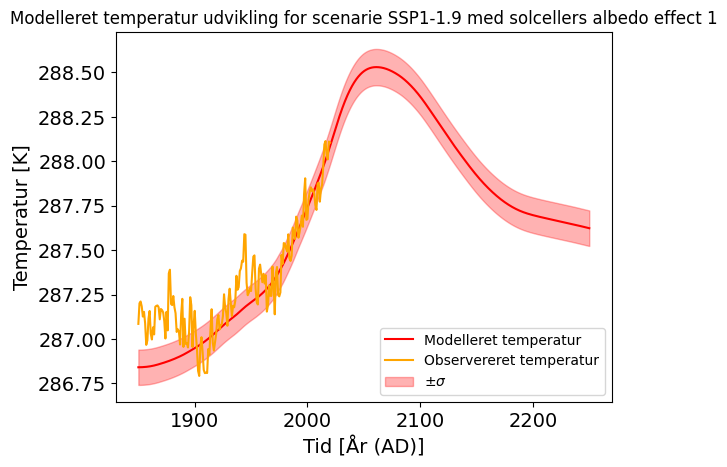

288.5300210392377 0.10238887888004418 2061.0527631907976
0.7543235025411832


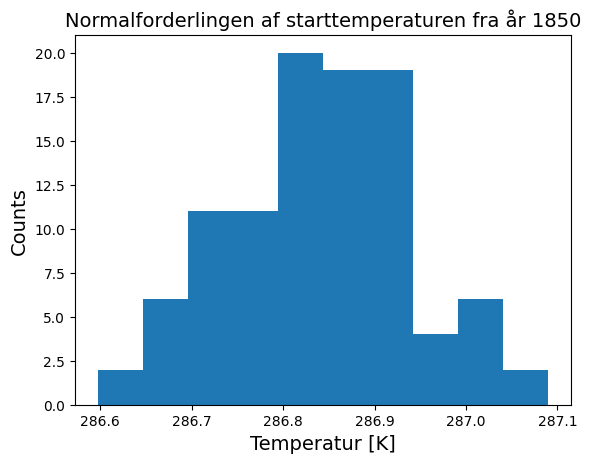

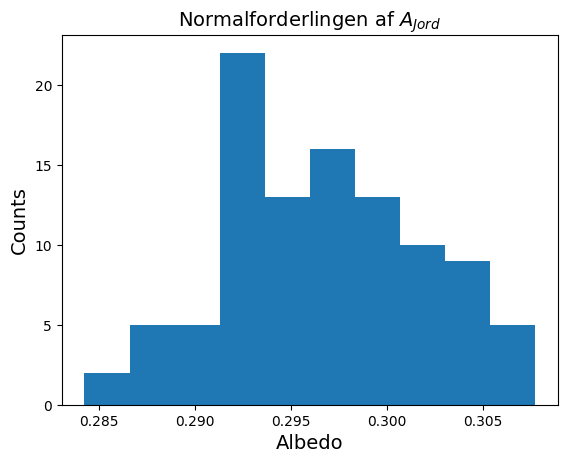

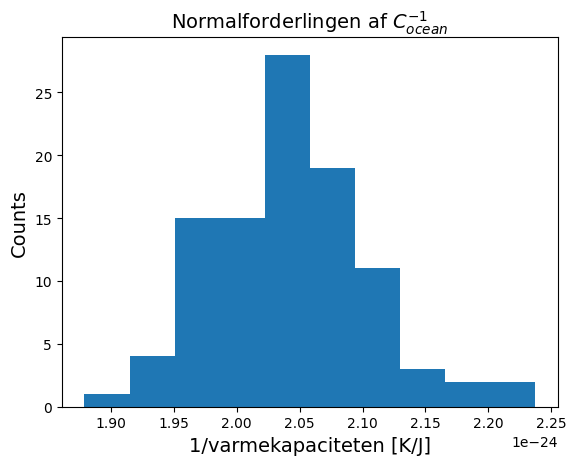

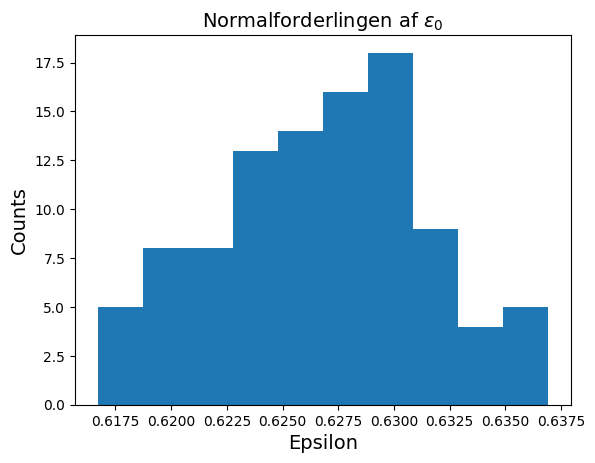

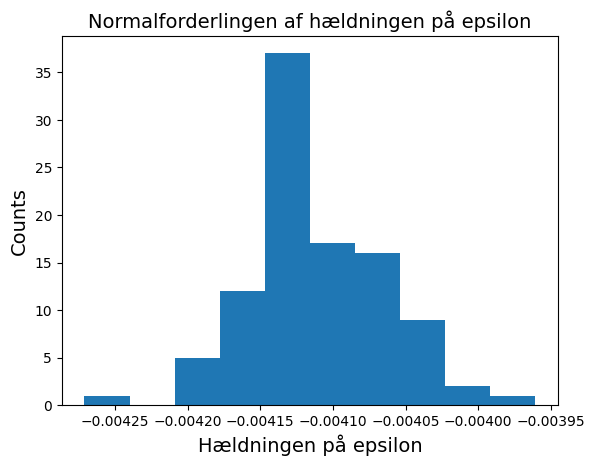

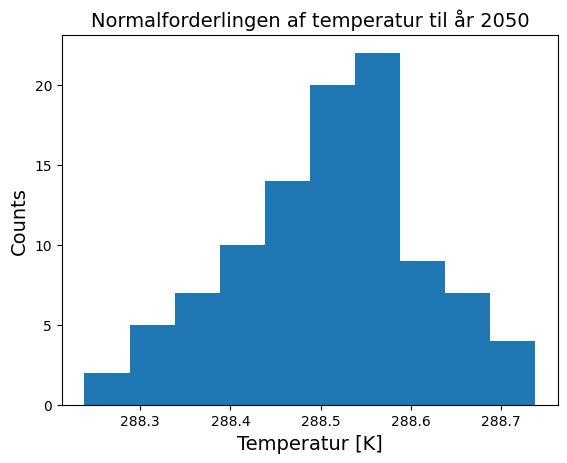

In [63]:
#PLOTNING
ObsOceanT=np.loadtxt('HadSST4_ocean_annual.txt')                                # Indlæsning af observeret havtemperatur

plt.plot(t,T10, label = "Modelleret temperatur", color = 'r')
plt.plot(ObsOceanT[:,0],ObsOceanT[:,1]+np.mean(T10[11_00:14_00]), label = "Observereret temperatur", color = 'orange')
plt.fill_between(t,T1_down,T1_up, label = "$\pm \sigma$", color = 'r', alpha=0.3)
plt.legend()
plt.title("Modelleret temperatur udvikling for scenarie SSP1-1.9 med solcellers albedo effect 1")
plt.xlabel('Tid [År (AD)]',fontsize=14)
plt.ylabel('Temperatur [K]',fontsize=14)
plt.tick_params(which='major',labelsize=14)

plt.show()
index = T10.argmax()
max_value1 = T10[index]
max_u1 = U_T1[index]
year = t[index]
print(max_value1,max_u1, year)
print(T10[index]-T10[1523])

plt.hist(stT)
plt.xlabel('Temperatur [K]', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title("Normalforderlingen af starttemperaturen fra år 1850", fontsize=14)
plt.show()

plt.hist(stA)
plt.xlabel('Albedo', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title("Normalforderlingen af $A_{Jord}$", fontsize=14)
plt.show()

plt.hist(stC)
plt.xlabel('1/varmekapaciteten [K/J]', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title("Normalforderlingen af $C_{ocean}^{-1}$", fontsize=14)
plt.show()

plt.hist(stEps)
plt.xlabel('Epsilon', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title("Normalforderlingen af $\epsilon_0$", fontsize=14)
plt.show()

plt.hist(stEdt)
plt.xlabel('Hældningen på epsilon', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title("Normalforderlingen af hældningen på epsilon", fontsize=14)
plt.show()

plt.hist(T1[:,2000])
plt.xlabel('Temperatur [K]', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title("Normalforderlingen af temperatur til år 2050", fontsize=14)
plt.show()

In [9]:
#DEFINITION AF SENARIO: SSP1-1.9 med udvikling af solceller

#ESW = FS*(1-A(15))*np.pi*REarth**2*dt*secyear  #Indkommende kortbølge-stråling beregnes
# Interpolering af SSP drivhusgas-forceringsscenarier til de angivne tidsskridt
scenarios = 1                                             # Her vælges, hvilket SSP-scenarie man anvender!
SSPint=interp1d(SSP[:,0],SSP[:,scenarios])                # Lineær interpolations-funktion defineres fro det valgte scenarie

human_ghg_on = True # Tænd og sluk for meneskeskabt drivhusgas-forcering
eps_temp_dep = True # Tænd og sluk for temperatur afhængig emissivitet
solcelle_vækst_on = True #Tænd og sluk for udvikling af solceller
A_nr_1_on = False #Tænd og sluk for A1 eller A2

#TEMPERATUR BEREGNING
T102 = np.zeros(N)
EOcean102 = np.zeros(N)
C = m
eps0 = 0.6263779897
T0=286.8405 
deps_dT=-0.00411
A0 = 0.297
T102[0]=T0                   # Initialisering af temperatur
EOcean102[0]=T0/C       # Initialisering af havets varme indhold

for i in range(0,N-1): #Løkke over alle tidsskridt "i" fra skridt 1 til skridt N
    P = np.array([T102[i], EOcean102[i], t[i]])
    dRK4 = RK4(P)
    T102[i+1], EOcean102[i+1]= T102[i]+dRK4[0],EOcean102[i]+dRK4[1]

#USIKKERHEDS BEREGNING
B = 100
T12 = np.zeros((B,N))
EOcean12 = np.zeros(N)

for j in range(B):
    C = m
    T0=286.8405
    eps0 = 0.6263779897
    deps_dT=-0.00411
    A0 = 0.297
    C = np.random.normal(m,m_err)
    A0 = np.random.normal(A0,A0_err)
    T0 = np.random.normal(T0,T0_err)
    #eps0 = np.random.normal(eps0,eps0_err)
    eps0 = (FS*(1-A0))/(4*SBconst*T0**4)
    deps_dt_err = np.random.normal(deps_dT,deps_dT_err)
    
    T12[j,0]=T0                   # Initialisering af temperatur
    EOcean12[0]=T0/C       # Initialisering af havets varme indhold

    for i in range(0,N-1): #Løkke over alle tidsskridt "i" fra skridt 1 til skridt N
        P = np.array([T12[j,i], EOcean12[i], t[i]])
        dRK4 = RK4(P)
        T12[j,i+1], EOcean12[i+1]= T12[j,i]+dRK4[0],EOcean12[i]+dRK4[1]

U_T12 = np.zeros(N)
T12_up = np.zeros(N)
T12_down = np.zeros(N)

for i in range(N):
    U_T12[i] = np.std(T12[:,i])
    T12_up[i] = T102[i] + U_T12[i]
    T12_down[i] = T102[i] - U_T12[i]

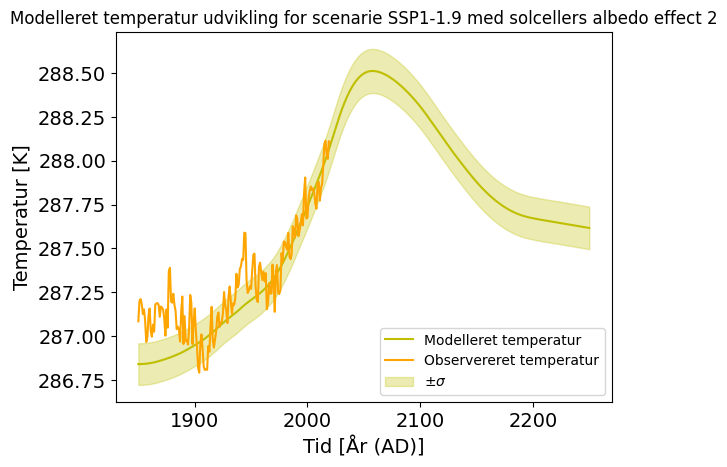

0.7354408866816584
288.51113842337816 0.12577285084020481 2057.751937984496


In [10]:
#PLOTNING
ObsOceanT=np.loadtxt('HadSST4_ocean_annual.txt')                                # Indlæsning af observeret havtemperatur

plt.plot(t,T102, label = "Modelleret temperatur", color = 'y')
plt.plot(ObsOceanT[:,0],ObsOceanT[:,1]+np.mean(T102[11_00:14_00]), label = "Observereret temperatur", color = 'orange')
plt.fill_between(t,T12_down,T12_up, label = "$\pm \sigma$", color = 'y', alpha=0.3)
plt.legend()
plt.title("Modelleret temperatur udvikling for scenarie SSP1-1.9 med solcellers albedo effect 2")
plt.xlabel('Tid [År (AD)]',fontsize=14)
plt.ylabel('Temperatur [K]',fontsize=14)
plt.tick_params(which='major',labelsize=14)

plt.show()
index = T102.argmax()
max_value12 = T102[index]
max_u12 = U_T12[index]
year = t[index]
print(T102[index]-T102[1523])
print(max_value12, max_u12, year)


In [11]:
#DEFINITION AF SENARIO: SSP1-1.9 uden udvikling af solceller

# Interpolering af SSP drivhusgas-forceringsscenarier til de angivne tidsskridt
scenarios = 1                                             # Her vælges, hvilket SSP-scenarie man anvender!
SSPint=interp1d(SSP[:,0],SSP[:,scenarios])                # Lineær interpolations-funktion defineres fro det valgte scenarie

human_ghg_on = True # Tænd og sluk for meneskeskabt drivhusgas-forcering
eps_temp_dep = True # Tænd og sluk for temperatur afhængig emissivitet
solcelle_vækst_on = False #Tænd og sluk for udvikling af solceller
A_nr_1_on = True #Tænd og sluk for A1 eller A2

#TEMPERATUR BEREGNING
T20 = np.zeros(N)
EOcean20 = np.zeros(N)
C = m
eps0 = 0.6263779897
deps_dT=-0.00411
T0=286.8405
A0 = 0.297
T20[0]=T0                   # Initialisering af temperatur
EOcean20[0]=T0/m       # Initialisering af havets varme indhold

for i in range(0,N-1): #Løkke over alle tidsskridt "i" fra skridt 1 til skridt N
    P = np.array([T20[i], EOcean20[i], t[i]])
    dRK4 = RK4(P)
    T20[i+1], EOcean20[i+1]= T20[i]+dRK4[0],EOcean20[i]+dRK4[1]

#USIKKERHEDS BEREGNING
B = 100
T2 = np.zeros((B,N))
EOcean2 = np.zeros(N)

for j in range(B):
    C = m
    T0=286.8405
    eps0 = 0.6263779897
    deps_dT=-0.00411
    A0 = 0.297
    C = np.random.normal(m,m_err)
    A0 = np.random.normal(A0,A0_err)
    T0 = np.random.normal(T0,T0_err)
    #eps0 = np.random.normal(eps0,eps0_err)
    eps0 = (FS*(1-A0))/(4*SBconst*T0**4)
    deps_dt_err = np.random.normal(deps_dT,deps_dT_err)
    
    T2[j,0]=T0                   # Initialisering af temperatur
    EOcean2[0]=T0/C       # Initialisering af havets varme indhold

    for i in range(0,N-1): #Løkke over alle tidsskridt "i" fra skridt 1 til skridt N
        P = np.array([T2[j,i], EOcean2[i], t[i]])
        dRK4 = RK4(P)
        T2[j,i+1], EOcean2[i+1]= T2[j,i]+dRK4[0],EOcean2[i]+dRK4[1]

U_T2 = np.zeros(N)
T2_up = np.zeros(N)
T2_down = np.zeros(N)

for i in range(N):
    U_T2[i] = np.std(T2[:,i])
    T2_up[i] = T20[i] + U_T2[i]
    T2_down[i] = T20[i] - U_T2[i]

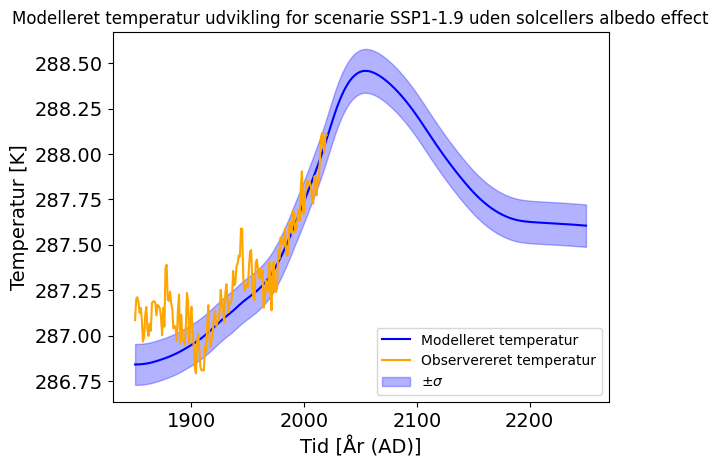

0.6815520201905656
288.45724955688706 0.12082268337596502 2054.351087771943


In [12]:
#PLOTNING
ObsOceanT=np.loadtxt('HadSST4_ocean_annual.txt')                                # Indlæsning af observeret havtemperatur

plt.plot(t,T20, label = "Modelleret temperatur", color = 'b')
plt.plot(ObsOceanT[:,0],ObsOceanT[:,1]+np.mean(T20[11_00:14_00]), label = "Observereret temperatur", color = 'orange')
plt.fill_between(t,T2_down,T2_up, label = "$\pm \sigma$", color = 'b', alpha=0.3)
plt.legend()
plt.title("Modelleret temperatur udvikling for scenarie SSP1-1.9 uden solcellers albedo effect")
plt.xlabel('Tid [År (AD)]',fontsize=14)
plt.ylabel('Temperatur [K]',fontsize=14)
plt.tick_params(which='major',labelsize=14)

plt.show()
index = T20.argmax()
max_u2 = U_T2[index]
max_value2 = T20[index]
year = t[index]
print(T20[index]-T20[1523])
print(max_value2,max_u2, year)

In [13]:
N5=4000             # Antal tidsskridt
dt=1/10              # Tidsskridt-størrelse i år
t5 = np.linspace(t0, t0 + N5*dt, N5) #Tids-array

#DEFINITION AF SENARIO: SSP5-8.5 uden udvikling af solceller

# Interpolering af SSP drivhusgas-forceringsscenarier til de angivne tidsskridt
scenarios = 5                                             # Her vælges, hvilket SSP-scenarie man anvender!
SSPint=interp1d(SSP[:,0],SSP[:,scenarios])                # Lineær interpolations-funktion defineres fro det valgte scenarie

human_ghg_on = True # Tænd og sluk for meneskeskabt drivhusgas-forcering
eps_temp_dep = True # Tænd og sluk for temperatur afhængig emissivitet
solcelle_vækst_on = False #Tænd og sluk for udvikling af solceller
A_nr_1_on = True #Tænd og sluk for A1 eller A2

#TEMPERATUR BEREGNING
T30 = np.zeros(N5)
EOcean20 = np.zeros(N5)
C = m
eps0 = 0.6263779897
T0=286.8405
deps_dT=-0.00411
A0 = 0.297
T30[0]=T0                   # Initialisering af temperatur
EOcean20[0]=T0/C       # Initialisering af havets varme indhold

for i in range(0,N5-1): #Løkke over alle tidsskridt "i" fra skridt 1 til skridt N
    P = np.array([T30[i], EOcean20[i], t5[i]])
    dRK4 = RK4(P)
    T30[i+1], EOcean20[i+1]= T30[i]+dRK4[0],EOcean20[i]+dRK4[1]

#USIKKERHEDS BEREGNING
B = 100
T3 = np.zeros((B,N5))
EOcean2 = np.zeros(N5)

for j in range(B):
    C = m
    T0=286.8405
    eps0 = 0.6263779897
    deps_dT=-0.00411
    A0 = 0.297
    C = np.random.normal(m,m_err)
    A0 = np.random.normal(A0,A0_err)
    T0 = np.random.normal(T0,T0_err)
    #eps0 = np.random.normal(eps0,eps0_err)
    eps0 = (FS*(1-A0))/(4*SBconst*T0**4)
    deps_dt_err = np.random.normal(deps_dT,deps_dT_err)
    
    T3[j,0]=T0                   # Initialisering af temperatur
    EOcean2[0]=T0/C       # Initialisering af havets varme indhold

    for i in range(0,N5-1): #Løkke over alle tidsskridt "i" fra skridt 1 til skridt N
        P = np.array([T3[j,i], EOcean2[i], t5[i]])
        dRK4 = RK4(P)
        T3[j,i+1], EOcean2[i+1]= T3[j,i]+dRK4[0],EOcean2[i]+dRK4[1]

U_T3 = np.zeros(N5)
T3_up = np.zeros(N5)
T3_down = np.zeros(N5)

for i in range(N5):
    U_T3[i] = np.std(T3[:,i])
    T3_up[i] = T30[i] + U_T3[i]
    T3_down[i] = T30[i] - U_T3[i]

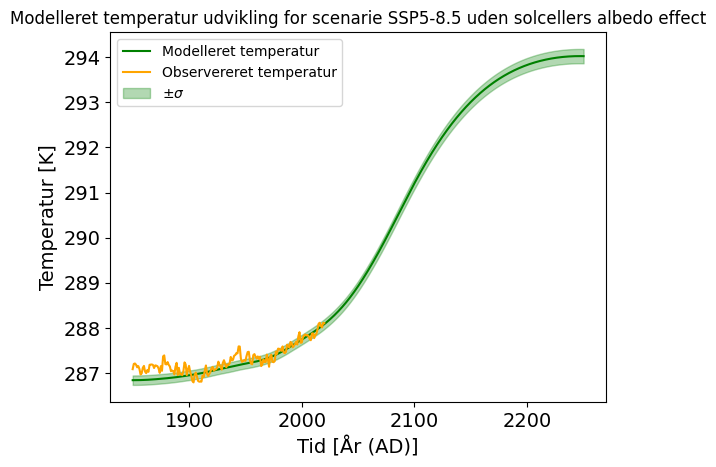

6.26027683402674
294.0232814847101 0.1592453599968548 2246.599149787447


In [49]:
#PLOTNING
ObsOceanT=np.loadtxt('HadSST4_ocean_annual.txt')                                # Indlæsning af observeret havtemperatur

plt.plot(t5,T30, label = "Modelleret temperatur", color = 'g')
plt.plot(ObsOceanT[:,0],ObsOceanT[:,1]+np.mean(T30[11_00:14_00]), label = "Observereret temperatur", color = 'orange')
plt.fill_between(t5,T3_down,T3_up, label = "$\pm \sigma$", color = 'g', alpha=0.3)
plt.legend()
plt.title("Modelleret temperatur udvikling for scenarie SSP5-8.5 uden solcellers albedo effect")
plt.xlabel('Tid [År (AD)]',fontsize=14)
plt.ylabel('Temperatur [K]',fontsize=14)
plt.tick_params(which='major',labelsize=14)

plt.show()
index = T30.argmax()
max_u3 = U_T3[index]
max_value3 = T30[index]
year = t[index]
print(T30[index]-T30[1515])
print(max_value3,max_u3, year)

In [15]:
N5=4000             # Antal tidsskridt
dt=1/10              # Tidsskridt-størrelse i år
t5 = np.linspace(t0, t0 + N5*dt, N5) #Tids-array

#DEFINITION AF SENARIO: SSP5-8.5 uden udvikling af solceller

# Interpolering af SSP drivhusgas-forceringsscenarier til de angivne tidsskridt
scenarios = 4                                             # Her vælges, hvilket SSP-scenarie man anvender!
SSPint=interp1d(SSP[:,0],SSP[:,scenarios])                # Lineær interpolations-funktion defineres fro det valgte scenarie

human_ghg_on = True # Tænd og sluk for meneskeskabt drivhusgas-forcering
eps_temp_dep = True # Tænd og sluk for temperatur afhængig emissivitet
solcelle_vækst_on = False #Tænd og sluk for udvikling af solceller
A_nr_1_on = True #Tænd og sluk for A1 eller A2

#TEMPERATUR BEREGNING
T302 = np.zeros(N5)
EOcean202 = np.zeros(N5)
C = m
eps0 = 0.6263779897
T0=286.8405
deps_dT=-0.00411
A0 = 0.297
T302[0]=T0                   # Initialisering af temperatur
EOcean202[0]=T0/C       # Initialisering af havets varme indhold

for i in range(0,N5-1): #Løkke over alle tidsskridt "i" fra skridt 1 til skridt N
    P = np.array([T302[i], EOcean202[i], t5[i]])
    dRK4 = RK4(P)
    T302[i+1], EOcean202[i+1]= T302[i]+dRK4[0],EOcean202[i]+dRK4[1]

#USIKKERHEDS BEREGNING
B = 100
T32 = np.zeros((B,N5))
EOcean22 = np.zeros(N5)

for j in range(B):
    C = m
    T0=286.8405
    eps0 = 0.6263779897
    deps_dT=-0.00411
    A0 = 0.297
    C = np.random.normal(m,m_err)
    A0 = np.random.normal(A0,A0_err)
    T0 = np.random.normal(T0,T0_err)
    #eps0 = np.random.normal(eps0,eps0_err)
    eps0 = (FS*(1-A0))/(4*SBconst*T0**4)
    deps_dt_err = np.random.normal(deps_dT,deps_dT_err)
    
    T32[j,0]=T0                   # Initialisering af temperatur
    EOcean22[0]=T0/C       # Initialisering af havets varme indhold

    for i in range(0,N5-1): #Løkke over alle tidsskridt "i" fra skridt 1 til skridt N
        P = np.array([T32[j,i], EOcean22[i], t5[i]])
        dRK4 = RK4(P)
        T32[j,i+1], EOcean22[i+1]= T32[j,i]+dRK4[0],EOcean22[i]+dRK4[1]

U_T32 = np.zeros(N5)
T32_up = np.zeros(N5)
T32_down = np.zeros(N5)

for i in range(N5):
    U_T32[i] = np.std(T32[:,i])
    T32_up[i] = T302[i] + U_T32[i]
    T32_down[i] = T302[i] - U_T32[i]

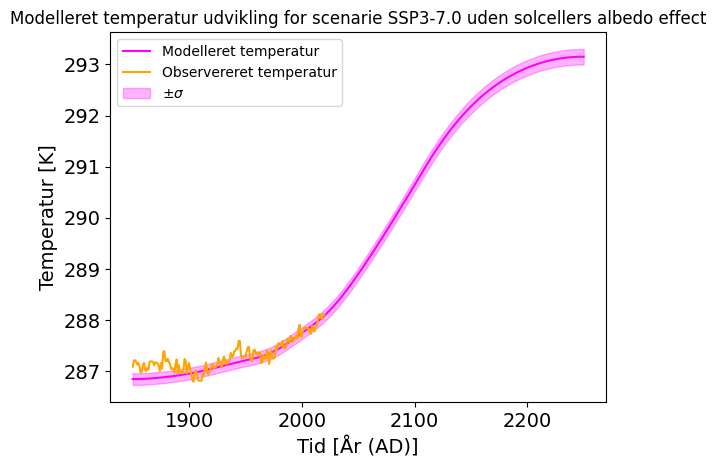

5.3880370586888375
293.1510417093722 0.1525577193301174 2249.099774943736


In [48]:
#PLOTNING
ObsOceanT=np.loadtxt('HadSST4_ocean_annual.txt')                                # Indlæsning af observeret havtemperatur

plt.plot(t5,T302, label = "Modelleret temperatur", color = 'magenta')
plt.plot(ObsOceanT[:,0],ObsOceanT[:,1]+np.mean(T302[11_00:14_00]), label = "Observereret temperatur", color = 'orange')
plt.fill_between(t5,T32_down,T32_up, label = "$\pm \sigma$", color = 'magenta', alpha=0.3)
plt.legend()
plt.title("Modelleret temperatur udvikling for scenarie SSP3-7.0 uden solcellers albedo effect")
plt.xlabel('Tid [År (AD)]',fontsize=14)
plt.ylabel('Temperatur [K]',fontsize=14)
plt.tick_params(which='major',labelsize=14)

plt.show()
index = T302.argmax()
max_value32 = T302[index]
max_u32 = U_T32[index]
year = t[index]
print(T302[index]-T302[1515])
print(max_value32,max_u32, year)

In [41]:
N5=4000             # Antal tidsskridt
dt=1/10              # Tidsskridt-størrelse i år
t5 = np.linspace(t0, t0 + N5*dt, N5) #Tids-array

#DEFINITION AF SENARIO: SSP5-8.5 uden udvikling af solceller

# Interpolering af SSP drivhusgas-forceringsscenarier til de angivne tidsskridt
scenarios = 2                                             # Her vælges, hvilket SSP-scenarie man anvender!
SSPint=interp1d(SSP[:,0],SSP[:,scenarios])                # Lineær interpolations-funktion defineres fro det valgte scenarie

human_ghg_on = True # Tænd og sluk for meneskeskabt drivhusgas-forcering
eps_temp_dep = True # Tænd og sluk for temperatur afhængig emissivitet
solcelle_vækst_on = False #Tænd og sluk for udvikling af solceller
A_nr_1_on = True #Tænd og sluk for A1 eller A2

#TEMPERATUR BEREGNING
T22 = np.zeros(N5)
EOcean22 = np.zeros(N5)
C = m
eps0 = 0.6263779897
T0=286.8405
deps_dT=-0.00411
A0 = 0.297
T22[0]=T0                   # Initialisering af temperatur
EOcean22[0]=T0/C       # Initialisering af havets varme indhold

for i in range(0,N5-1): #Løkke over alle tidsskridt "i" fra skridt 1 til skridt N
    P = np.array([T22[i], EOcean22[i], t5[i]])
    dRK4 = RK4(P)
    T22[i+1], EOcean22[i+1]= T22[i]+dRK4[0],EOcean22[i]+dRK4[1]

#USIKKERHEDS BEREGNING
B = 100
T220 = np.zeros((B,N5))
EOcean220 = np.zeros(N5)

for j in range(B):
    C = m
    T0=286.8405
    eps0 = 0.6263779897
    deps_dT=-0.00411
    A0 = 0.297
    C = np.random.normal(m,m_err)
    A0 = np.random.normal(A0,A0_err)
    T0 = np.random.normal(T0,T0_err)
    #eps0 = np.random.normal(eps0,eps0_err)
    eps0 = (FS*(1-A0))/(4*SBconst*T0**4)
    deps_dt_err = np.random.normal(deps_dT,deps_dT_err)
    
    T220[j,0]=T0                   # Initialisering af temperatur
    EOcean220[0]=T0/C       # Initialisering af havets varme indhold

    for i in range(0,N5-1): #Løkke over alle tidsskridt "i" fra skridt 1 til skridt N
        P = np.array([T220[j,i], EOcean220[i], t5[i]])
        dRK4 = RK4(P)
        T220[j,i+1], EOcean220[i+1]= T220[j,i]+dRK4[0],EOcean220[i]+dRK4[1]

U_T220 = np.zeros(N5)
T220_up = np.zeros(N5)
T220_down = np.zeros(N5)

for i in range(N5):
    U_T220[i] = np.std(T220[:,i])
    T220_up[i] = T22[i] + U_T220[i]
    T220_down[i] = T22[i] - U_T220[i]

In [43]:
N5=4000             # Antal tidsskridt
dt=1/10              # Tidsskridt-størrelse i år
t5 = np.linspace(t0, t0 + N5*dt, N5) #Tids-array

#DEFINITION AF SENARIO: SSP5-8.5 uden udvikling af solceller

# Interpolering af SSP drivhusgas-forceringsscenarier til de angivne tidsskridt
scenarios = 3                                             # Her vælges, hvilket SSP-scenarie man anvender!
SSPint=interp1d(SSP[:,0],SSP[:,scenarios])                # Lineær interpolations-funktion defineres fro det valgte scenarie

human_ghg_on = True # Tænd og sluk for meneskeskabt drivhusgas-forcering
eps_temp_dep = True # Tænd og sluk for temperatur afhængig emissivitet
solcelle_vækst_on = False #Tænd og sluk for udvikling af solceller
A_nr_1_on = True #Tænd og sluk for A1 eller A2

#TEMPERATUR BEREGNING
T320 = np.zeros(N5)
EOcean320 = np.zeros(N5)
C = m
eps0 = 0.6263779897
T0=286.8405
deps_dT=-0.00411
A0 = 0.297
T320[0]=T0                   # Initialisering af temperatur
EOcean320[0]=T0/C       # Initialisering af havets varme indhold

for i in range(0,N5-1): #Løkke over alle tidsskridt "i" fra skridt 1 til skridt N
    P = np.array([T320[i], EOcean320[i], t5[i]])
    dRK4 = RK4(P)
    T320[i+1], EOcean320[i+1]= T320[i]+dRK4[0],EOcean320[i]+dRK4[1]

#USIKKERHEDS BEREGNING
B = 100
T3200 = np.zeros((B,N5))
EOcean3200 = np.zeros(N5)

for j in range(B):
    C = m
    T0=286.8405
    eps0 = 0.6263779897
    deps_dT=-0.00411
    A0 = 0.297
    C = np.random.normal(m,m_err)
    A0 = np.random.normal(A0,A0_err)
    T0 = np.random.normal(T0,T0_err)
    #eps0 = np.random.normal(eps0,eps0_err)
    eps0 = (FS*(1-A0))/(4*SBconst*T0**4)
    deps_dt_err = np.random.normal(deps_dT,deps_dT_err)
    
    T3200[j,0]=T0                   # Initialisering af temperatur
    EOcean3200[0]=T0/C       # Initialisering af havets varme indhold

    for i in range(0,N5-1): #Løkke over alle tidsskridt "i" fra skridt 1 til skridt N
        P = np.array([T3200[j,i], EOcean3200[i], t5[i]])
        dRK4 = RK4(P)
        T3200[j,i+1], EOcean3200[i+1]= T3200[j,i]+dRK4[0],EOcean3200[i]+dRK4[1]

U_T3200 = np.zeros(N5)
T3200_up = np.zeros(N5)
T3200_down = np.zeros(N5)

for i in range(N5):
    U_T3200[i] = np.std(T3200[:,i])
    T3200_up[i] = T320[i] + U_T3200[i]
    T3200_down[i] = T320[i] - U_T3200[i]

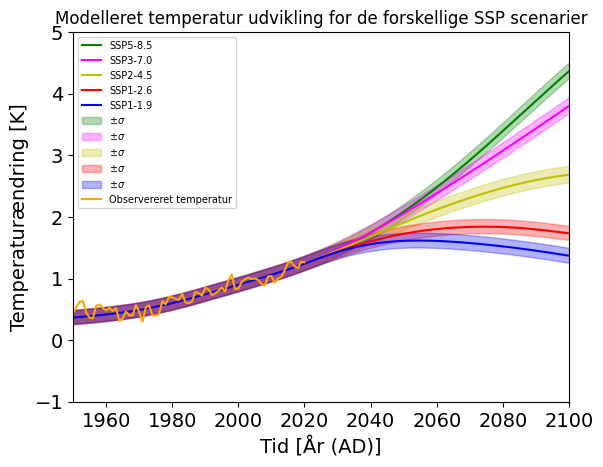

0.07277148235061759
0.05388886649109281
5.566031927823019


In [50]:
T0=286.8405
#PLOTNING
ObsOceanT=np.loadtxt('HadSST4_ocean_annual.txt')                                # Indlæsning af observeret havtemperatur
plt.plot(t5,T30-T0, label = "SSP5-8.5", color = 'g')
plt.plot(t5,T302-T0, label = "SSP3-7.0", color = 'magenta')
plt.plot(t,T320-T0, label = "SSP2-4.5", color = 'y')
plt.plot(t,T22-T0, label = "SSP1-2.6", color = 'r')
plt.plot(t,T20-T0, label = "SSP1-1.9", color = 'b')
plt.fill_between(t5,T3_down-T0,T3_up-T0, label = "$\pm \sigma$", color = 'g', alpha=0.3)
plt.fill_between(t5,T32_down-T0,T32_up-T0, label = "$\pm \sigma$", color = 'magenta', alpha=0.3)
plt.fill_between(t,T3200_down-T0,T3200_up-T0, label = "$\pm \sigma$", color = 'y', alpha=0.3)
plt.fill_between(t,T220_down-T0,T220_up-T0, label = "$\pm \sigma$", color = 'r', alpha=0.3)
plt.fill_between(t,T2_down-T0,T2_up-T0, label = "$\pm \sigma$", color = 'b', alpha=0.3)
plt.plot(ObsOceanT[:,0],ObsOceanT[:,1]+np.mean(T10[11_00:14_00])-T0, label = "Observereret temperatur", color = 'orange')




plt.xlim(1950,2100)
plt.ylim(-1,5)
plt.legend(fontsize=7)
plt.title("Modelleret temperatur udvikling for de forskellige SSP scenarier")
plt.xlabel('Tid [År (AD)]',fontsize=14)
plt.ylabel('Temperaturændring [K]',fontsize=14)
plt.tick_params(which='major',labelsize=14)

plt.show()
print(max_value1-max_value2)
print(max_value12-max_value2)
print(max_value3-max_value2)

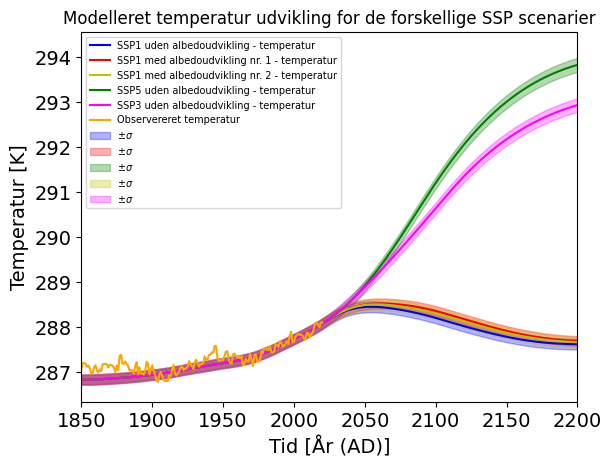

In [22]:
plt.plot(t,T20, label = "SSP1 uden albedoudvikling - temperatur", color = 'b')
plt.plot(t,T10, label = "SSP1 med albedoudvikling nr. 1 - temperatur", color = 'r')
plt.plot(t,T102, label = "SSP1 med albedoudvikling nr. 2 - temperatur", color = 'y')
plt.plot(t5,T30, label = "SSP5 uden albedoudvikling - temperatur", color = 'g')
plt.plot(t5,T302, label = "SSP3 uden albedoudvikling - temperatur", color = 'magenta')
plt.plot(ObsOceanT[:,0],ObsOceanT[:,1]+np.mean(T10[11_00:14_00]), label = "Observereret temperatur", color = 'orange')
plt.fill_between(t,T2_down,T2_up, label = "$\pm \sigma$", color = 'b', alpha=0.3)
plt.fill_between(t,T1_down,T1_up, label = "$\pm \sigma$", color = 'r', alpha=0.3)
plt.fill_between(t5,T3_down,T3_up, label = "$\pm \sigma$", color = 'g', alpha=0.3)
plt.fill_between(t,T12_down,T12_up, label = "$\pm \sigma$", color = 'y', alpha=0.3)
plt.fill_between(t5,T32_down,T32_up, label = "$\pm \sigma$", color = 'magenta', alpha=0.3)
plt.xlim(1850,2200)
plt.legend(fontsize=7)
plt.title("Modelleret temperatur udvikling for de forskellige SSP scenarier")
plt.xlabel('Tid [År (AD)]',fontsize=14)
plt.ylabel('Temperatur [K]',fontsize=14)
plt.tick_params(which='major',labelsize=14)

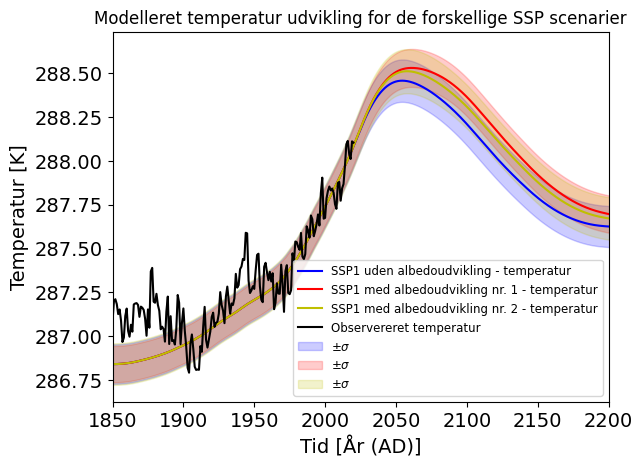

288.5300210392377 288.51113842337816 294.0232814847101
0.07277148235061759
0.05388886649109281


In [18]:
#PLOTNING
ObsOceanT=np.loadtxt('HadSST4_ocean_annual.txt')                                # Indlæsning af observeret havtemperatur

plt.plot(t,T20, label = "SSP1 uden albedoudvikling - temperatur", color = 'b')
plt.plot(t,T10, label = "SSP1 med albedoudvikling nr. 1 - temperatur", color = 'r')
plt.plot(t,T102, label = "SSP1 med albedoudvikling nr. 2 - temperatur", color = 'y')

plt.plot(ObsOceanT[:,0],ObsOceanT[:,1]+np.mean(T10[11_00:14_00]), label = "Observereret temperatur", color = 'black')
plt.fill_between(t,T2_down,T2_up, label = "$\pm \sigma$", color = 'b', alpha=0.2)
plt.fill_between(t,T1_down,T1_up, label = "$\pm \sigma$", color = 'r', alpha=0.2)
plt.fill_between(t,T12_down,T12_up, label = "$\pm \sigma$", color = 'y', alpha=0.2)
plt.legend(fontsize=8.5)
plt.title("Modelleret temperatur udvikling for de forskellige SSP scenarier")
plt.xlabel('Tid [År (AD)]',fontsize=14)
plt.ylabel('Temperatur [K]',fontsize=14)
plt.tick_params(which='major',labelsize=14)
plt.xlim(1850,2200)

plt.show()
print(max_value1,max_value12,max_value3)
print(max_value1-max_value2)
print(max_value12-max_value2)
